In [1]:
import numpy as np
from scipy.stats import norm
import plotly.express as px
import pandas as pd

"""I - BASIC"""
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes price for a European call or put option.
    
    Parameters:
    S : float : Current stock price (S_0)
    K : float : Strike price
    T : float : Time to maturity (in years)
    r : float : Risk-free interest rate
    sigma : float : Volatility (standard deviation of stock's returns)
    option_type : str : 'call' for call option, 'put' for put option (default is 'call')
    
    Returns:
    float : Option price (call or put)
    """
    # Calculate d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Call Option
    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
    # Put Option
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    # Calculate Greeks
    delta = norm.cdf(d1) if option_type == 'call' else norm.cdf(d1) - 1
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T) / 100  # Vega is often expressed per 1% change in volatility
    if option_type == 'call':
        theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
                 - r * K * np.exp(-r * T) * norm.cdf(d2)) / 365
    elif option_type == 'put':
        theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
                 + r * K * np.exp(-r * T) * norm.cdf(-d2)) / 365


    return option_price, delta, gamma, vega, theta


# Example usage
S = 100  # Current stock price
K = 105  # Strike price
T = 1    # Time to maturity in years
r = 0.05  # Risk-free interest rate (5%)
sigma = 0.2  # Volatility (20%)

call_price = black_scholes(S, K, T, r, sigma, option_type='call')[0]
put_price = black_scholes(S, K, T, r, sigma, option_type='put')[0]

print(f"Call Price: {call_price:.2f}")
print(f"Put Price: {put_price:.2f}")



Call Price: 8.02
Put Price: 7.90


In [2]:
print(black_scholes(100,105,1, 0.05, 0.2))


(8.021352235143176, 0.5422283335848053, 0.019835261904213263, 0.3967052380842653, -0.017197606676738413)


In [3]:


K = 100
sigma= 0.16
r=0.1/100
T=60/252
list_call =[]
list_put = []
spot = []
list_delta_call =[]
list_delta_put =[]
list_gamma_call =[]
list_gamma_put =[]
list_vega_call =[]
list_vega_put =[]
list_theta_call =[]
list_theta_put=[]

for S in range(50,200):
    spot.append(S)
    list_call.append(black_scholes(S, K, T, r, sigma, option_type='call')[0])
    list_put.append(black_scholes(S, K, T, r, sigma, option_type='put')[0])
    list_delta_call.append(black_scholes(S, K, T, r, sigma, option_type='call')[1])
    list_delta_put.append(black_scholes(S, K, T, r, sigma, option_type='put')[1])
    list_gamma_call.append(black_scholes(S, K, T, r, sigma, option_type='call')[2])
    list_gamma_put.append(black_scholes(S, K, T, r, sigma, option_type='put')[2])
    list_vega_call.append(black_scholes(S, K, T, r, sigma, option_type='call')[3])
    list_vega_put.append(black_scholes(S, K, T, r, sigma, option_type='put')[3])
    list_theta_call.append(black_scholes(S, K, T, r, sigma, option_type='call')[4])
    list_theta_put.append(black_scholes(S, K, T, r, sigma, option_type='put')[4])
    
df=pd.DataFrame({"Call Price":list_call, "Put Price":list_put, "Spot Price":spot})
df.set_index("Spot Price", inplace = True)
px.line(df, title='Prices of a Call and Put')

    


In [4]:
df=pd.DataFrame({"Delta Call":list_delta_call, "Delta Put":list_delta_put, "Spot Price":spot})
df.set_index("Spot Price", inplace = True)
px.line(df, title='Delta of a Call and Put')

In [5]:
df=pd.DataFrame({"Gamma Call":list_gamma_call, "Gamma Put":list_gamma_put, "Spot Price":spot})
df.set_index("Spot Price", inplace = True)
px.line(df, title='Gamma of a Call and Put')

In [6]:
df=pd.DataFrame({"Vega Call":list_vega_call, "Vega Put":list_vega_put, "Spot Price":spot})
df.set_index("Spot Price", inplace = True)
px.line(df, title='Vega of a Call and Put')

In [7]:
df=pd.DataFrame({"Theta Call":list_theta_call, "Theta Put":list_theta_put, "Spot Price":spot})
df.set_index("Spot Price", inplace = True)
px.line(df, title='Theta of a Call and Put')

In [8]:
"""II - Delta Hedge"""
k=100
s_0=100
T=60/252
T_59=59/252
sigma=0.16
r=0.1/100

Call_Price_ATM=black_scholes(s_0, k, T, r, sigma, option_type='call')[0]
Delta_Call_Price_ATM=black_scholes(s_0, k, T, r, sigma, option_type='call')[1]
potfolio_60d =((Call_Price_ATM)-(Delta_Call_Price_ATM*100))
print(Delta_Call_Price_ATM)
print(Call_Price_ATM)
print(potfolio_60d)

Call_Price_59d =[]
spot =[]
PnL =[]

for S in range(90, 120):
    
    spot.append(S)
    Call_Price_59d.append(black_scholes(S, k, T_59, r, sigma, option_type='call')[0])
    PnL.append(Call_Price_59d[-1]-(Call_Price_ATM)-(Delta_Call_Price_ATM*100)*(spot[-1]-100)/100)


df=pd.DataFrame({"PnL":PnL, "Spot Price":spot})
df.set_index("Spot Price", inplace = True)
px.line(df, title='PnL between 60d and 59d')


0.5167848063625212
3.125378735756833
-48.55310190049529


In [9]:
"""III - P&L over a period"""
k=100
s_0=100
T=60/252
sigma=0.16
sigma_20=0.2
sigma_10=0.1
r=0.1/100

dt= 1/252
nb_simu = 1000
nb_step = 60

def simulate_stock_path(s_0, r, sigma, dt):
    nb_step = 60  # Number of time steps
    stock_prices = np.zeros(nb_step)
    stock_prices[0] = s_0
    for t in range(1, nb_step):
        z = np.random.normal(0, 1)
        stock_prices[t] = stock_prices[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return stock_prices

def simulate_delta_hedging(s_0, k, r, sigma, dt):
    stock_path = simulate_stock_path(s_0, r, sigma, dt)
    option_values = []
    hedge_values = []
    pnl = []
    spot=[]
    current_T = 60/252
    Call_Value = black_scholes(s_0, k, T, r, sigma, option_type='call')[0]
    Call_delta=black_scholes(s_0, k, T, r, sigma, option_type='call')[1]
    option_values.append(Call_Value)
    hedge_values.append(Call_delta * s_0)

    for t in range(1, 60):
        current_T = (60 - t) / 252
        current_S = stock_path[t]
        spot.append(current_S)
        current_Call_Value = black_scholes(current_S, k, current_T, r, sigma, option_type='call')[0]
        New_Delta=black_scholes(current_S, k, current_T, r, sigma, option_type='call')[1]

        option_pnl = current_Call_Value - option_values[-1]
        hedge_pnl = (New_Delta - Call_delta) * current_S
        pnl.append(option_pnl-hedge_pnl)
        option_values.append(current_Call_Value)
        hedge_values.append(New_Delta * current_S)
        Call_delta = New_Delta
    total_pnl = np.sum(pnl)
    return stock_path, pnl, total_pnl, spot



Call_Price_ATM=black_scholes(s_0, k, T, r, sigma, option_type='call')[0]
Delta_Call_Price_ATM=black_scholes(s_0, k, T, r, sigma, option_type='call')[1]
potfolio_60d =((Call_Price_ATM)-(Delta_Call_Price_ATM*100))
print(Delta_Call_Price_ATM)
print(Call_Price_ATM)
print(potfolio_60d)

Call_Price_59d =[]
spot =[]
PnL =[]



0.5167848063625212
3.125378735756833
-48.55310190049529


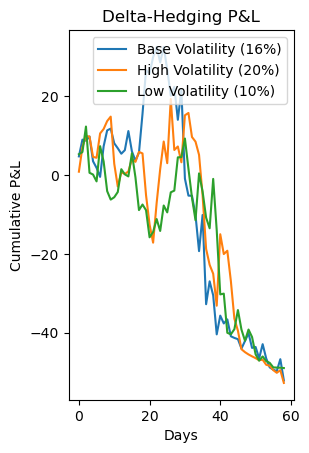

In [10]:
import matplotlib.pyplot as plt

s_0=100
sigma=0.16
sigma_20=0.2
sigma_10=0.1
dt= 1/252

stock_path_base, pnl_16, total_pnl_16, spot_16 = simulate_delta_hedging(s_0, K, r, sigma, dt)
stock_path_base, pnl_20, total_pnl_20, spot_20 = simulate_delta_hedging(s_0, K, r, sigma_20, dt)
stock_path_base, pnl_10, total_pnl_10, spot_10 = simulate_delta_hedging(s_0, K, r, sigma_10, dt)

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pnl_16), label="Base Volatility (16%)")
plt.plot(np.cumsum(pnl_20), label="High Volatility (20%)")
plt.plot(np.cumsum(pnl_10), label="Low Volatility (10%)")
plt.title("Delta-Hedging P&L")
plt.xlabel("Days")
plt.ylabel("Cumulative P&L")
plt.legend()

In [11]:
"""IV - Call Spread"""
K_1 = 80
K_2= 120
T=60/252
sigma=0.16
r=0.1/100

list_long_call =[]
list_short_call = []
payoff_long_call=[]
payoff_short_call=[]
spot = []
list_delta_long_call =[]
list_delta_short_call =[]
list_gamma_long_call =[]
list_gamma_short_call =[]
list_vega_long_call=[]
list_vega_short_call =[]
list_theta_long_call =[]
list_theta_short_call=[]
Spread_Payoff=[]
Spread_Delta=[]
Spread_Gamma=[]
Spread_Vega=[]
Spread_Theta=[]

for S in range(50,200):
    spot.append(S)
    list_long_call.append(black_scholes(S, K_1, T, r, sigma, option_type='call')[0])
    list_short_call.append(black_scholes(S, K_2, T, r, sigma, option_type='call')[0])
    Spread_Payoff.append((black_scholes(S, K_1, T, r, sigma, option_type='call')[0])-(black_scholes(S, K_2, T, r, sigma, option_type='call')[0]))
    list_delta_long_call.append(black_scholes(S, K_1, T, r, sigma, option_type='call')[1])
    list_delta_short_call.append(black_scholes(S, K_2, T, r, sigma, option_type='call')[1])
    Spread_Delta.append((black_scholes(S, K_1, T, r, sigma, option_type='call')[1])-(black_scholes(S, K_2, T, r, sigma, option_type='call')[1]))
    list_gamma_long_call.append(black_scholes(S, K_1, T, r, sigma, option_type='call')[2])
    list_gamma_short_call.append(black_scholes(S, K_2, T, r, sigma, option_type='call')[2])
    Spread_Gamma.append((black_scholes(S, K_1, T, r, sigma, option_type='call')[2])-(black_scholes(S, K_2, T, r, sigma, option_type='call')[2]))
    list_vega_long_call.append(black_scholes(S, K_1, T, r, sigma, option_type='call')[3])
    list_vega_short_call.append(black_scholes(S, K_2, T, r, sigma, option_type='call')[3])
    Spread_Vega.append((black_scholes(S, K_1, T, r, sigma, option_type='call')[3])-(black_scholes(S, K_2, T, r, sigma, option_type='call')[3]))
    list_theta_long_call.append(black_scholes(S, K_1, T, r, sigma, option_type='call')[4])
    list_theta_short_call.append(black_scholes(S, K_2, T, r, sigma, option_type='call')[4])
    Spread_Theta.append((black_scholes(S, K_1, T, r, sigma, option_type='call')[4])-(black_scholes(S, K_2, T, r, sigma, option_type='call')[4]))

df=pd.DataFrame({"Spread Payoff":Spread_Payoff, "Long Call K=80":list_long_call, "Short Call K=120":list_short_call, "Spot Price":spot})
df.set_index("Spot Price", inplace = True)
px.line(df, title='Call Spread')

In [12]:
df=pd.DataFrame({"Spread Delta":Spread_Delta, "Long Call K=80":list_delta_long_call, "Short Call K=120":list_delta_short_call, "Spot Price":spot})
df.set_index("Spot Price", inplace = True)
px.line(df, title='Delta Spread')

In [13]:
df=pd.DataFrame({"Spread Gamma":Spread_Gamma, "Long Call K=80":list_gamma_long_call, "Short Call K=120":list_gamma_short_call, "Spot Price":spot})
df.set_index("Spot Price", inplace = True)
px.line(df, title='Gamma Spread')

In [14]:
df=pd.DataFrame({"Spread Vega":Spread_Vega, "Long Call K=80":list_vega_long_call, "Short Call K=120":list_vega_short_call, "Spot Price":spot})
df.set_index("Spot Price", inplace = True)
px.line(df, title='Vega Spread')

In [15]:
df=pd.DataFrame({"Spread Theta":Spread_Theta, "Long Call K=80":list_theta_long_call, "Short Call K=120":list_theta_short_call, "Spot Price":spot})
df.set_index("Spot Price", inplace = True)
px.line(df, title='Theta Spread')

In [16]:
"""V - European barrier option"""


'V - European barrier option'